# **Experimental Results** 



### ***A. Comparison of Training and Cross-Validation Results Before and After Hyperparameter Optimisation and Baseline Performance***

<p style="font-size: 14px;text-align: justify;">The experiments involved running the models on both the training set and the cross-validation fold (5-fold stratified CV), comparing their performance before and after hyperparameter tuning. The results of our (untuned) classifiers on the cross-validation set were used as our baseline performance, as shown in Figure. 2. The evaluation metrics (Recall, F1-score and ROC-AUC) are tailored to the positive class since it has fewer instances and primarily because financial institutions might be more interested in defaulters.
</p>


  <figure>
    <img src="..\reports\figures\Positive Metrics for Untuned Models on Training Set.png" width=600>
    <figcaption style="font-size: 16px;"><b> Figure 1. Training set metrics before hyperparameter tuning</b></figcaption>
  </figure>

 

<p style="font-size: 14px;text-align: justify;">
The model's performance on the cross-validation set confirmed that the DT was overfitting, with its performance ranking second poorest, while SVM ranked the lowest. XGBoost achieved the highest f1-score of 0.45, with KNN ranking second with 0.44, as shown in Figure 2. 
We then tuned the hyperparameters of our models, resulting in improved performance on both the training and cross-validation folds. XGBoost performed the highest, with an f1-score (1) of 0.54, a precision (1) of 0.49, and a recall (1) of 0.59. SVM also demonstrated strong performance, with an f1-score of 0.53, a precision of 0.50, and a recall of 0.57. The strong general performance of our models even across even the cross-validation folds is shown in Figures 3 and 4.
</p>


  <figure>
    <img src="..\reports\figures\Positive Metrics for Untuned Models on Cross-Validation set.png" width=600>
    <figcaption style="font-size: 16px;"><b> Figure 2. Cross-Validation set metrics before hyperparameter tuning</b></figcaption>
  </figure>


  <figure>
    <img src="..\reports\figures\Evaluation Metrics on Training Set After Tuning (RandomisedSearchCV).png
    " width=600>
    <figcaption style="font-size: 16px;"><b> Figure 3. Evaluation Metrics on Training Set After Tuning</b></figcaption>
  </figure>

  <figure>
    <img src="..\reports\figures\Evaluation Metrics (positive class) on Cross Validation Splits After Tuning (RandomisedSearchCV).png
    " width=600>
    <figcaption style="font-size: 16px;"><b> Figure 4. Evaluation Metrics (positive class) on Cross Validation Splits After Tuning (RandomisedSearchCV)</b></figcaption>
  </figure>



 
### ***B.	ROC Curves Comparison for the Top Three Models***
For model selection, we used the ROC-AUC Score to evaluate the classifier’s ability to distinguish between classes across various thresholds. Figures 5-7 shows the ROC-AUC of the top three models (after tuning).
 

<figure>
    <img src="..\reports\figures\XGBoost auc.png
" width=600>
    <figcaption style="font-size: 16px;"><b> Figure 5. XGBoost ROC-AUC</b></figcaption>
  </figure>
  
<figure>
    <img src="..\reports\Figures\K-Nearest Neighbour auc.png" width=600>
    <figcaption style="font-size: 16px;"><b> Figure 6. K-Nearest Neighbour ROC-AUC</b></figcaption>
  </figure>

  <figure>
    <img src="..\reports\figures\Support Vector Machine auc.png" width=600>
    <figcaption style="font-size: 16px;"><b> Figure 7. Support Vector Machine ROC-AUC</b></figcaption>
  </figure>



Table 1. ROC-AUC and Precision Recall AUC (All Models)
| Model                   | ROC-AUC | Precision-Recall AUC |
|-------------------------|---------|---------------------|
| Decision Tree           | 0.73    | 0.49                |
| Logistic Regression     | 0.72    | 0.48                |
| XGBoost                 | 0.77    | 0.526               |
| K Nearest Neighbour     | 0.76    | 0.525               |
| Support Vector Machines | 0.75    | 0.49                |





### ***C.	Overview of Results***
<p style="text-align: justify; font-size:14px;">The confusion matrix, macro recall, and macro F1-score analysis on the test set indicated that XGBoost had the strongest general performance (macro-recall: 0.73, macro-F1: 0.72) with SVM reaching a similar performance (macro-recall: 0.71, macro-f1: 0.70).
</p> 

Table 2. Performance on Test Set (Top Three Models Models)
| Model                   | Macro F1 | Macro Recall |
|-------------------------|----------|--------------|
| XGBoost                 | **0.72** | **0.73**     |
| Support Vector Machines | 0.71     | **0.73**     |
| K Nearest Neighbour     | 0.69     | 0.71         |


---

In [11]:
# Load the data
from data.data_preparation import split_columns,remove_duplicates, remove_nulls
from data.data_collection import load_credit_data
from model_selection.evaluation_utils import get_train_metrics, get_cv_metrics
from plotting.evaluation_plots import plot_confusion_matrix
import joblib
import pandas as pd
from model_selection.model_training import get_train_test_data
from feature_preparation.feature_engineering import create_payment_consistency, create_total_delays, get_scaler
from feature_preparation.feature_selection import feature_transformation_pipeline
from feature_preparation.feature_selection import scale_continuous_columns
from model_selection.model_evaluation import CV

In [2]:
df = load_credit_data()

# Split columns into categorical and continuous
splitted_columns = split_columns(df)
categorical_columns = splitted_columns['categorical_columns']
continuous_columns = splitted_columns['continuous_columns']

# data cleaning
df = remove_duplicates(df)
df = remove_nulls(df)

# split data
X_train,X_test,y_train,y_test = get_train_test_data(X=df.drop(columns="Y"),y=df.Y, 
                                                    random_state=70,stratify=True)



In [3]:
# We get the transformed data and new continous_column with dropped columns and appended columns
print(continuous_columns)
transformed_X_train, new_continuous_columns = feature_transformation_pipeline(X_train,continuous_columns)
print(new_continuous_columns)
transformed_X_train.head()

['credit_amount', 'sept_bill', 'august_bill', 'july_bill', 'june_bill', 'may_bill', 'april_bill', 'sept_payment', 'august_payment', 'july_payment', 'june_payment', 'may_payment', 'april_payment', 'age']
['credit_amount', 'sept_bill', 'august_bill', 'july_bill', 'sept_payment', 'august_payment', 'july_payment', 'june_payment', 'may_payment', 'april_payment', 'age', 'payment_consistency']


,credit_amount,gender,education,marital_status,age,sept_delay,august_delay,july_delay,sept_bill,august_bill,july_bill,sept_payment,august_payment,july_payment,june_payment,may_payment,april_payment,payment_consistency,total_delays
3355,380000,2,2,1,48,0,0,0,363191,373421,363343,15504,14000,12500,12000,11000,14000,1634.136673,0
28151,300000,2,1,2,32,0,0,0,169223,179223,199223,10000,20000,11022,4935,6,2844,7168.075606,0
8934,330000,1,2,1,34,-1,-1,-2,901,0,0,0,0,0,0,0,0,0.000000,-10
13540,100000,1,2,1,28,-1,-1,-2,10000,0,0,0,0,0,0,0,0,0.000000,-10
14378,50000,1,3,2,26,2,0,0,41827,42650,45930,1800,4000,0,3500,2000,0,1685.724374,8


In [4]:
# Now we get the scaler
scaler = get_scaler(transformed_X_train, new_continuous_columns)
scaled_X_train =  scale_continuous_columns(transformed_X_train, new_continuous_columns, scaler)
scaled_X_train.head()

,credit_amount,gender,education,marital_status,age,sept_delay,august_delay,july_delay,sept_bill,august_bill,july_bill,sept_payment,august_payment,july_payment,june_payment,may_payment,april_payment,payment_consistency,total_delays
3355,1.627653,2,2,1,1.349715,0,0,0,4.250262,4.573655,4.543440,0.575387,0.307912,0.378597,0.449329,0.389037,0.493483,-0.274274,0
28151,1.014662,2,1,2,-0.379368,0,0,0,1.611526,1.838360,2.188173,0.252055,0.542256,0.300221,0.004822,-0.310951,-0.134652,0.075266,0
8934,1.244533,1,2,1,-0.163232,-1,-1,-2,-0.678323,-0.686012,-0.670854,-0.335393,-0.238892,-0.284265,-0.305672,-0.311334,-0.294783,-0.377491,-10
13540,-0.517817,1,2,1,-0.811639,-1,-1,-2,-0.554540,-0.686012,-0.670854,-0.335393,-0.238892,-0.284265,-0.305672,-0.311334,-0.294783,-0.377491,-10
14378,-0.900937,1,3,2,-1.027774,2,0,0,-0.121567,-0.085283,-0.011717,-0.229652,-0.082662,-0.284265,-0.085463,-0.183993,-0.294783,-0.271016,8


In [5]:
X_test.head()

,credit_amount,gender,education,marital_status,age,sept_delay,august_delay,july_delay,june_delay,may_delay,...,july_bill,june_bill,may_bill,april_bill,sept_payment,august_payment,july_payment,june_payment,may_payment,april_payment
1523,30000,2,1,2,27,2,2,2,2,2,...,28497,29862,43148,30603,1800,0,2150,900,3776,0
10093,210000,2,2,1,40,-1,-1,2,-1,-1,...,1108,1499,2447,888,5258,0,1500,2500,1000,1500
16779,50000,1,2,1,47,1,-1,2,2,-1,...,25600,-400,40000,0,47000,0,0,20400,0,0
2575,180000,1,1,1,48,0,0,0,0,0,...,162477,166861,171083,169365,8000,6000,7000,7000,7000,7000
4286,30000,2,3,2,22,0,0,0,0,0,...,25591,16337,19690,19986,2006,2041,2001,4004,2006,2000


In [6]:
# putting it all together for the test set
transformed_X_test, new_continuous_columns = feature_transformation_pipeline(X_test,continuous_columns)
# using the same scaler from train data
scaled_X_test =  scale_continuous_columns(transformed_X_test, new_continuous_columns, scaler)
scaled_X_test.head()


,credit_amount,gender,education,marital_status,age,sept_delay,august_delay,july_delay,sept_bill,august_bill,july_bill,sept_payment,august_payment,july_payment,june_payment,may_payment,april_payment,payment_consistency,total_delays
1523,-1.054185,2,1,2,-0.919706,2,2,2,-0.306853,-0.273868,-0.261896,-0.229652,-0.238892,-0.170252,-0.249047,-0.070915,-0.294783,-0.285831,12
10093,0.325046,2,2,1,0.485174,-1,-1,2,-0.660434,-0.599501,-0.654953,-0.026513,-0.238892,-0.204721,-0.148380,-0.247663,-0.210326,-0.263256,-3
16779,-0.900937,1,2,1,1.241648,1,-1,2,-0.699532,-0.033281,-0.303471,2.425613,-0.238892,-0.284265,0.977829,-0.311334,-0.294783,0.843379,2
2575,0.095174,1,1,1,1.349715,0,0,0,1.583189,1.577560,1.660835,0.134566,-0.004547,0.086938,0.134745,0.134357,0.099350,-0.337543,0
4286,-1.054185,2,3,2,-1.460045,0,0,0,-0.301792,-0.310179,-0.303600,-0.217551,-0.159175,-0.178154,-0.053753,-0.183611,-0.182173,-0.326085,0


In [7]:
# load random search object
tree_random_search = joblib.load("../models/random_search_objects/tree_random_search.joblib")
knn_random_search =joblib.load("../models/random_search_objects/knn_random_search.joblib")
svm_random_search =joblib.load('../models/random_search_objects/svm_random_search.joblib')
xgb_random_search = joblib.load('../models/random_search_objects/xgb_random_search.joblib')
log_reg_random_search = joblib.load("../models/random_search_objects/log_reg_random_search.joblib")

# extract classifier
tree = tree_random_search[0]
knn = knn_random_search[0] 
svm = svm_random_search [0]
xgb = xgb_random_search [0]
log_reg = log_reg_random_search[0]

In [12]:


print("Evaluation Metrics of Tuned Models on Training Data".upper().center(75,'='))
get_train_metrics(tree, "Decision Tree",scaled_X_train, y_train)
get_train_metrics(log_reg, "Logistic Regression",scaled_X_train, y_train )
get_train_metrics(svm, "Support Vector Machine",scaled_X_train, y_train )
get_train_metrics(knn, "K-Nearest Neighbour",scaled_X_train, y_train )
get_train_metrics(xgb, "Xtreme Gradient Boost",scaled_X_train, y_train )

print("Evaluation Metrics of Tuned Models on Cross Validation Data".upper().center(75,'='))
get_cv_metrics(tree, "Decision Tree",scaled_X_train, y_train,cv=CV)
get_cv_metrics(log_reg, "Logistic Regression",scaled_X_train, y_train,cv=CV )
get_cv_metrics(svm, "Support Vector Machine",scaled_X_train, y_train,cv=CV )
get_cv_metrics(knn, "K-Nearest Neighbour",scaled_X_train, y_train,cv=CV )
get_cv_metrics(xgb, "Xtreme Gradient Boost",scaled_X_train, y_train ,cv=CV)

============EVALUATION METRICS OF TUNED MODELS ON TRAINING DATA============
============================== Decision Tree ==============================
=========================== Classification Report==========================
              precision    recall  f1-score   support

 Non-Default       0.87      0.81      0.84     16334
     Default       0.46      0.57      0.51      4641

    accuracy                           0.76     20975
   macro avg       0.67      0.69      0.68     20975
weighted avg       0.78      0.76      0.77     20975

---------------------------------------------------------------------------
Recall: 0.57100
Precision-Score: 0.46499
F1-Score: 0.51257

=========================== Logistic Regression ===========================
=========================== Classification Report==========================
              precision    recall  f1-score   support

 Non-Default       0.87      0.69      0.77     16334
     Default       0.37      0.64      0.47     

### Confusion Matrix

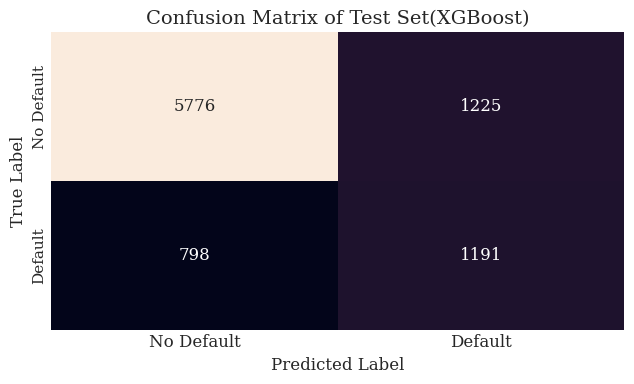

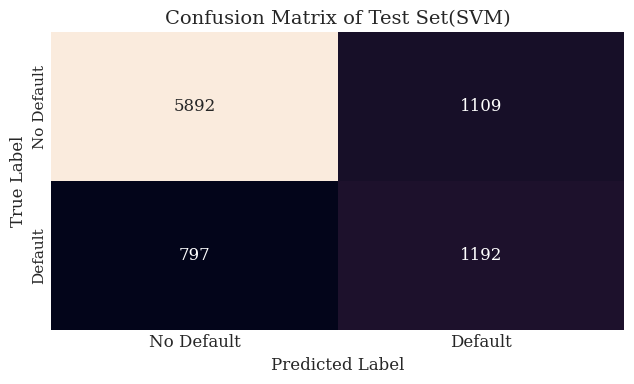

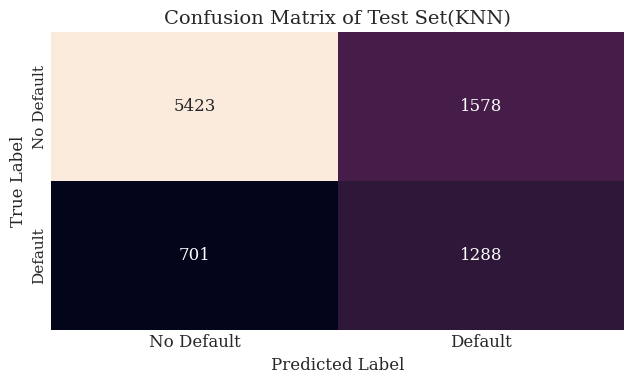

In [14]:
# Top Three Models
plot_confusion_matrix(y_pred=xgb.predict(scaled_X_test),y_true=y_test, title="Confusion Matrix of Test Set(XGBoost)")
plot_confusion_matrix(y_pred=svm.predict(scaled_X_test),y_true=y_test, title="Confusion Matrix of Test Set(SVM)")
plot_confusion_matrix(y_pred=knn.predict(scaled_X_test),y_true=y_test, title="Confusion Matrix of Test Set(KNN)")

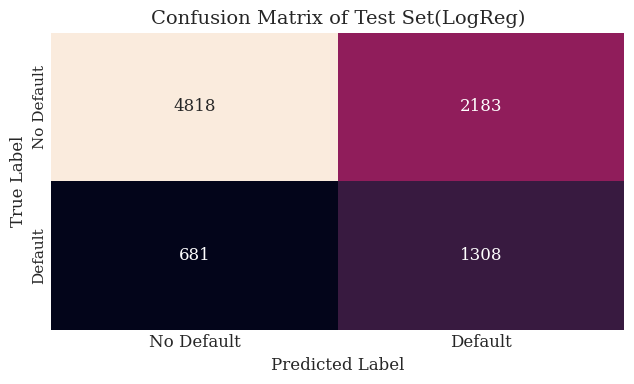

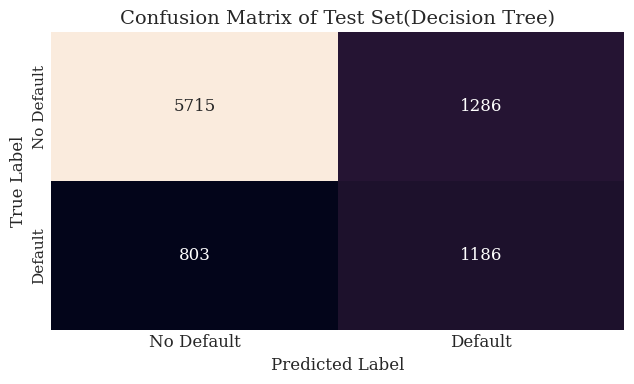

In [ ]:
plot_confusion_matrix(y_pred=log_reg.predict(scaled_X_test),y_true=y_test, title="Confusion Matrix of Test Set(LogReg)")
plot_confusion_matrix(y_pred=tree.predict(scaled_X_test),y_true=y_test, title="Confusion Matrix of Test Set(Decision Tree)")


In [15]:
get_train_metrics(svm, "Support Vector Machine",scaled_X_test, y_test )
get_train_metrics(knn, "K-Nearest Neighbour",scaled_X_test, y_test )
get_train_metrics(xgb, "Xtreme Gradient Boost",scaled_X_test, y_test )

========================== Support Vector Machine =========================
=========================== Classification Report==========================
              precision    recall  f1-score   support

 Non-Default       0.88      0.84      0.86      7001
     Default       0.52      0.61      0.56      1989

    accuracy                           0.79      8990
   macro avg       0.70      0.73      0.71      8990
weighted avg       0.80      0.79      0.80      8990

---------------------------------------------------------------------------
Recall: 0.60734
Precision-Score: 0.52385
F1-Score: 0.56251

=========================== K-Nearest Neighbour ===========================
=========================== Classification Report==========================
              precision    recall  f1-score   support

 Non-Default       0.88      0.80      0.84      7001
     Default       0.47      0.63      0.54      1989

    accuracy                           0.76      8990
   macro avg   